In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from IPython.display import clear_output

In [3]:
from tensorflow_gan import GAN
from tensorflow_gan.gans import dcgan

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
%load_ext autoreload
%autoreload 2

# Loading MNIST data

In [5]:
(x_real, _), (_, _) = mnist.load_data()
x_real = x_real / 127.5 - 1.0 # Rescale [0, 255] grayscale pixel values to [-1, 1]
x_real = np.expand_dims(x_real, axis=3)
print('x_real shape:', x_real.shape)  

x_real shape: (60000, 28, 28, 1)


# DCGAN

[Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks by Alec Radford, Luke Metz, Soumith Chintala](https://arxiv.org/abs/1511.06434) 201

The intial GAN architecture that was able to sucessfully leveraged convolution and leakyRELU to generate realistically images

## Initialization

In [6]:
generator = dcgan.generator((50,), (28, 28, 1), filters=256, reshape_size=7, alpha=0.01, num_blocks=2)
discriminator = dcgan.discriminator((28, 28, 1), filters=32, alpha=0.01, num_blocks=3)
optimizer = dcgan.optimizer

## Building

In [7]:
gan = GAN(generator, discriminator)
gan.compile(optimizer=optimizer)
gan.summary()

[Discriminator]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_v1_2 (Ba (None, 24, 24, 64)        256       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       73856

## Training

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.



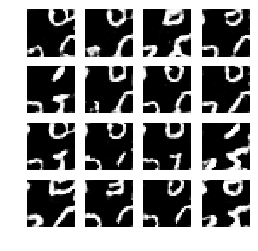

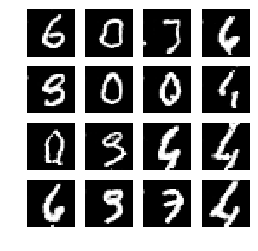

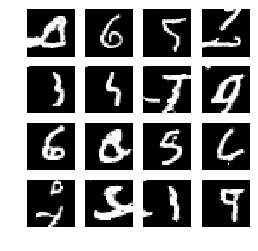

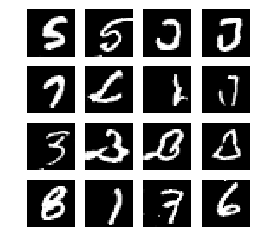

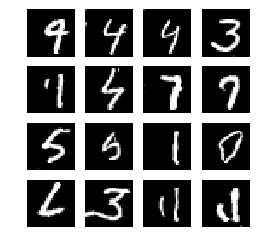

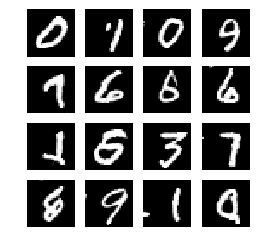

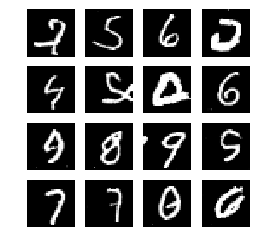

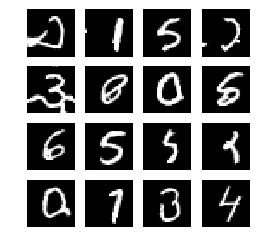

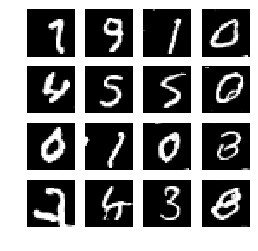

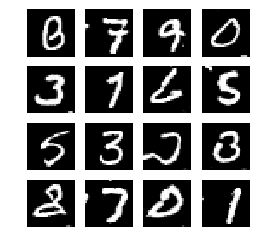

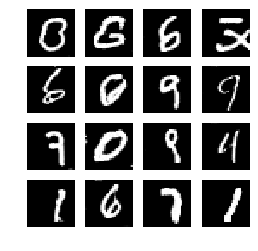

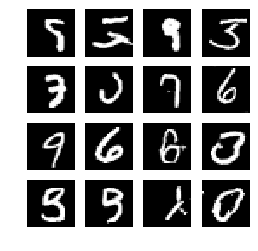

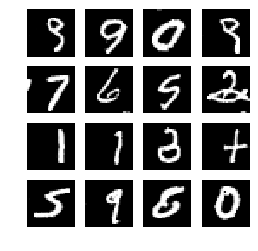

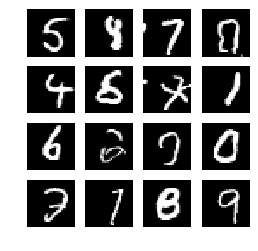

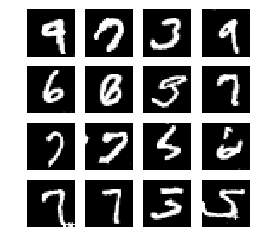

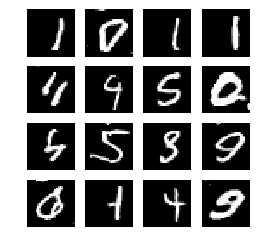

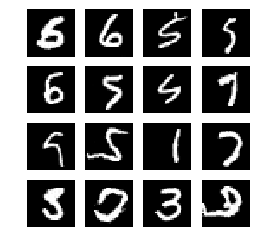

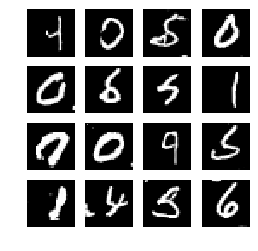

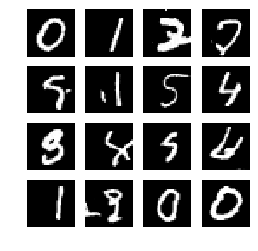

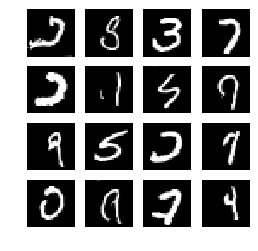

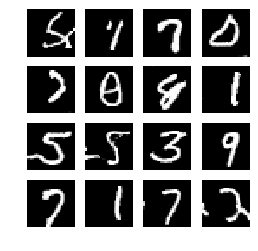

In [8]:
gan.fit(x_real, epochs=100, batch_size=128, sample_interval=5)